In [1]:
# imports
#for custom libs
import sys
sys.path.insert(1,'../SimplifiedPythonFiles/')
sys.path.insert(1,'../ClassificationCNN/')
 
import KeyIsolator as ki
import Auxiliaries as aux
import CNN as cnn

import pickle
import time
import librosa
from pydub import AudioSegment, silence
import sklearn
import torch
from sklearn.model_selection import train_test_split
from torchvision.transforms import Compose
import random
from datetime import datetime
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
import pandas as pd
from openai import Client #better choice than ollama

# Base run

In [2]:
# Setting up constants
N_FFT, HOP_LENGTH, BEFORE, AFTER = 1024, 225, 2400, 12000

# Amount of samples among all dataset (USE SR=44100)
key_length = 8820

# Run
for num in range(1, 5):
    # Loading audio samples. For this run, using only Mac audio samples
    samples, sr = librosa.load(f'../MKA-dataset/{num}mac.wav', sr=44100)
    # Loading same audio samples as AudioSegment for pydub
    pydub_samples = AudioSegment.from_file(f'../MKA-dataset/{num}mac.wav', format="wav", frame_rate=44100)
    
    # Loading audio samples. For this run, using only Dataset-for-Binary audio samples
    samples2, sr = librosa.load(f'../Dataset-for-Binary/base-audio/audio_{num}.wav', sr=44100)
    # Loading same audio samples as AudioSegment for pydub
    pydub_samples2 = AudioSegment.from_file(f'../Dataset-for-Binary/base-audio/audio_{num}.wav', format='wav', 
                                           frame_rate=44100, sample_width=4)
    
    # Detecting silences in samples using pydub
    silences = silence.detect_silence(pydub_samples, silence_thresh=1.01*pydub_samples.dBFS, min_silence_len=50)
    ovr_dbms = []
    for start_ind, final_ind in silences:
        ovr_dbms.append(pydub_samples[start_ind:final_ind].dBFS)
    avg_dbfs = np.average(ovr_dbms)
    
    # Detecting silences in samples2 using pydub
    silences2 = silence.detect_silence(pydub_samples2, silence_thresh=1.01*pydub_samples2.dBFS, min_silence_len=50)
    ovr_dbms2 = []
    for start_ind, final_ind in silences2:
        ovr_dbms2.append(pydub_samples2[start_ind:final_ind].dBFS)
    avg_dbfs2 = np.average(ovr_dbms2)
    

In [3]:
# currently used keys
curr_keys = list('1234567890QWERTYUIOPASDFGHJKLZXCVBNM')

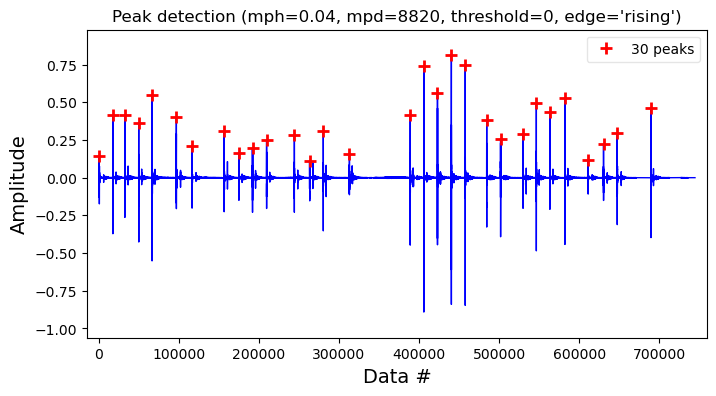

key 1
final k=0.500	num_keys=31	peaks=30



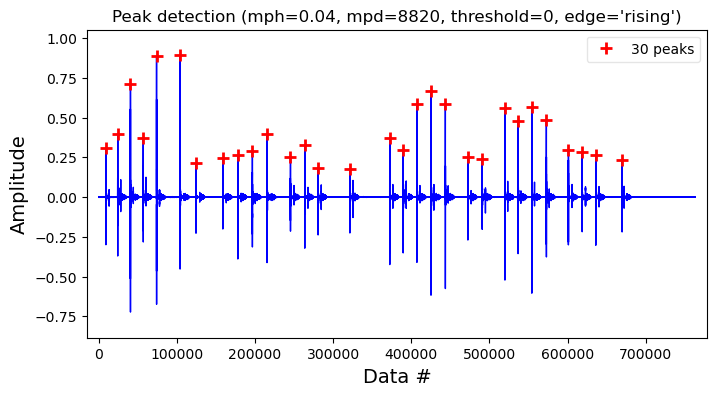

key 2
final k=0.500	num_keys=30	peaks=30



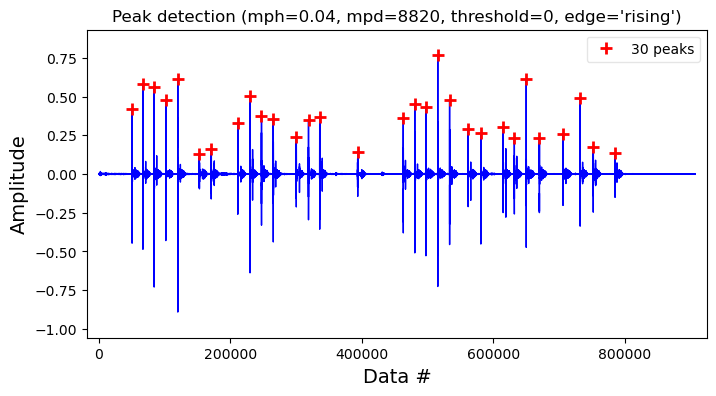

key 3
final k=0.500	num_keys=30	peaks=30



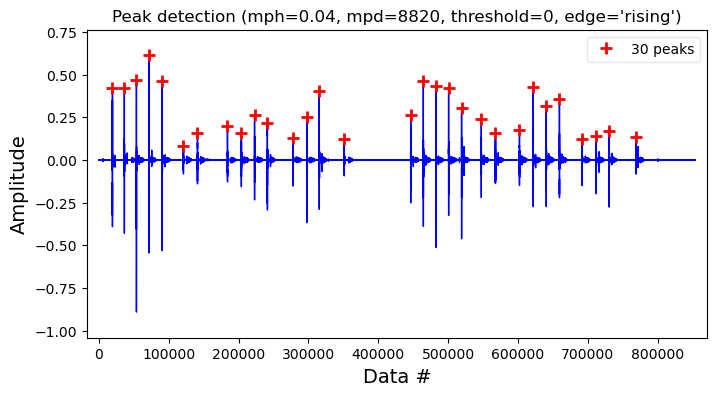

key 4
final k=0.500	num_keys=30	peaks=30



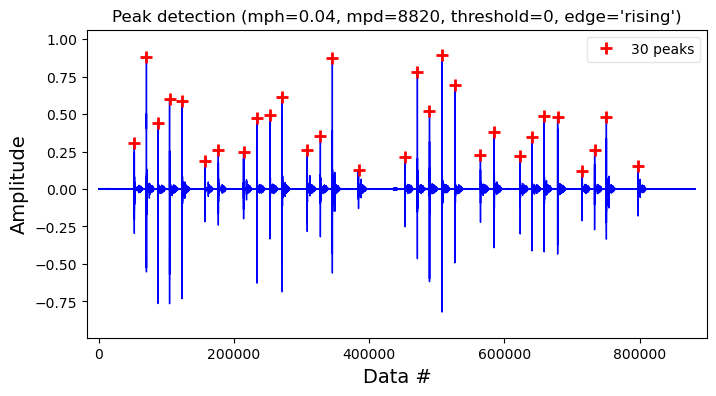

key 5
final k=0.500	num_keys=30	peaks=30



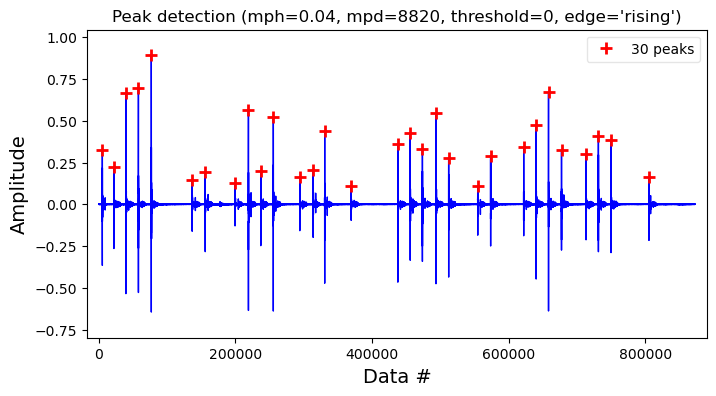

key 6
final k=0.500	num_keys=30	peaks=30



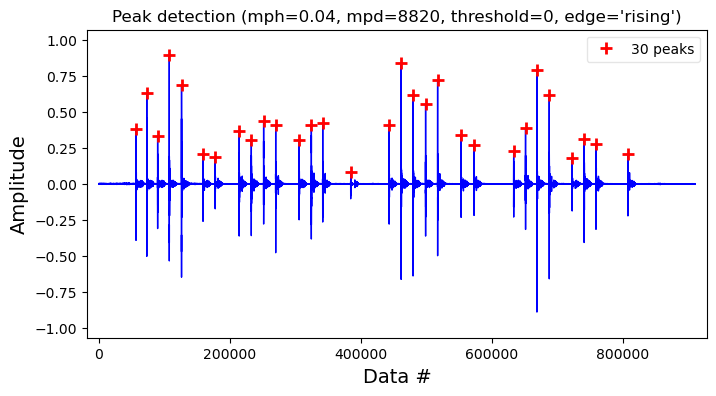

key 7
final k=0.500	num_keys=30	peaks=30



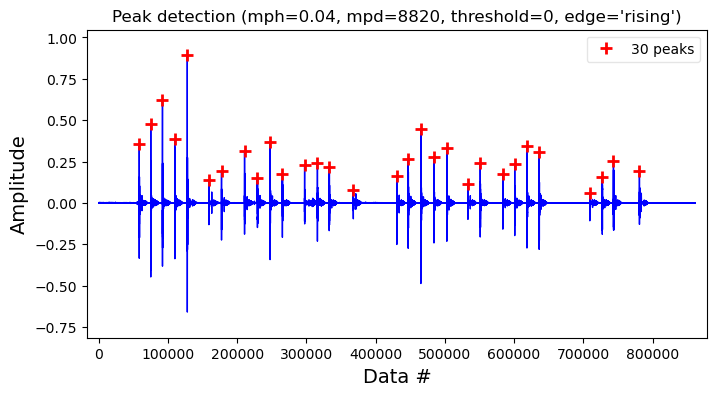

key 8
final k=0.500	num_keys=30	peaks=30



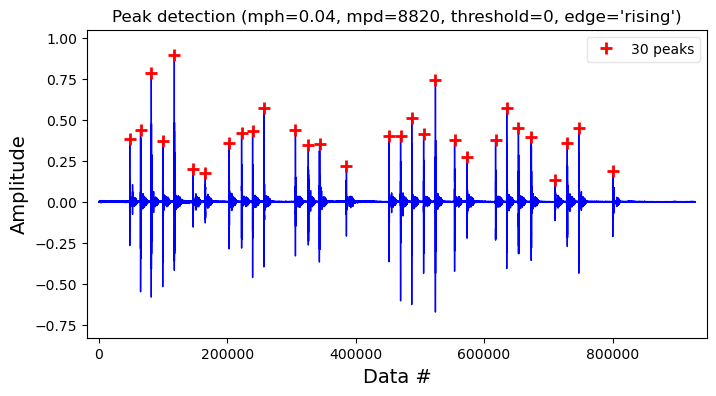

key 9
final k=0.500	num_keys=30	peaks=30



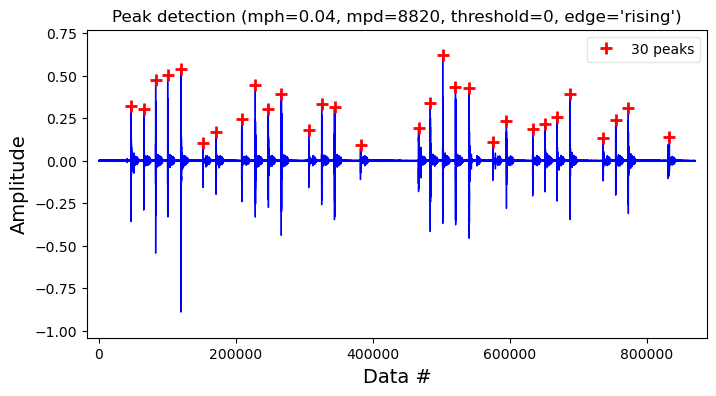

key 0
final k=0.500	num_keys=20	peaks=30



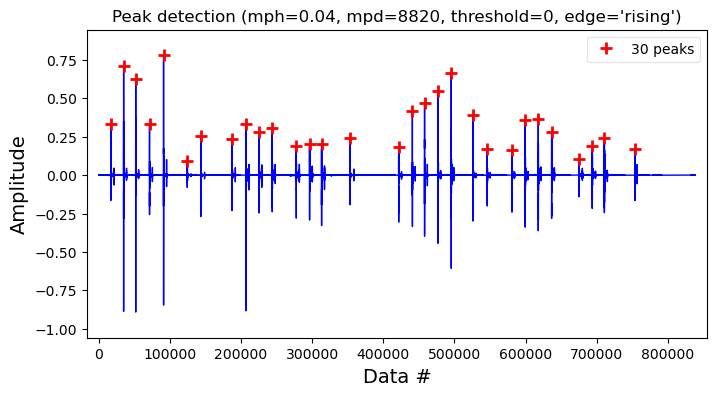

key Q
final k=0.500	num_keys=33	peaks=30



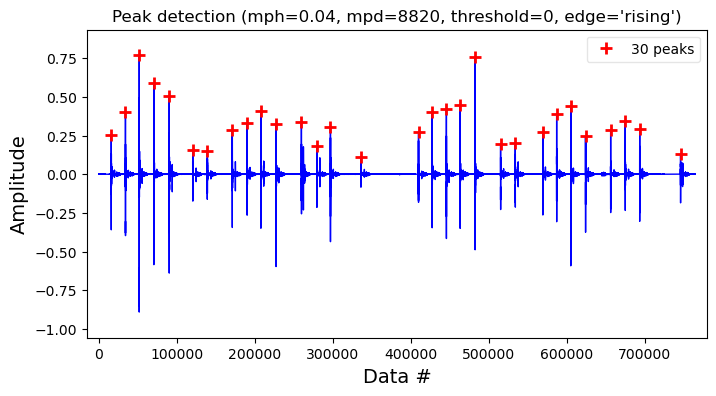

key W
final k=0.500	num_keys=30	peaks=30



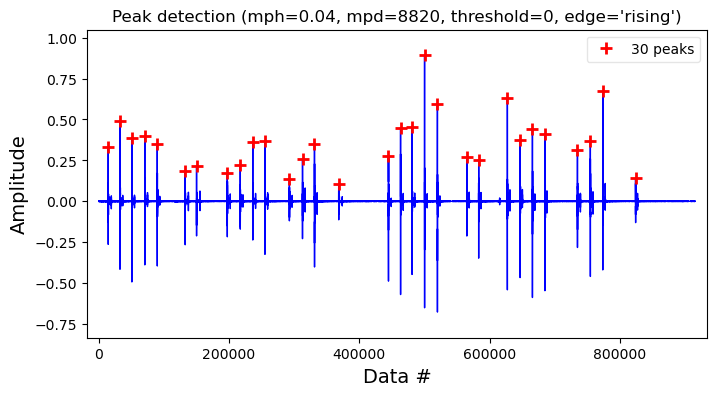

key E
final k=0.500	num_keys=33	peaks=30



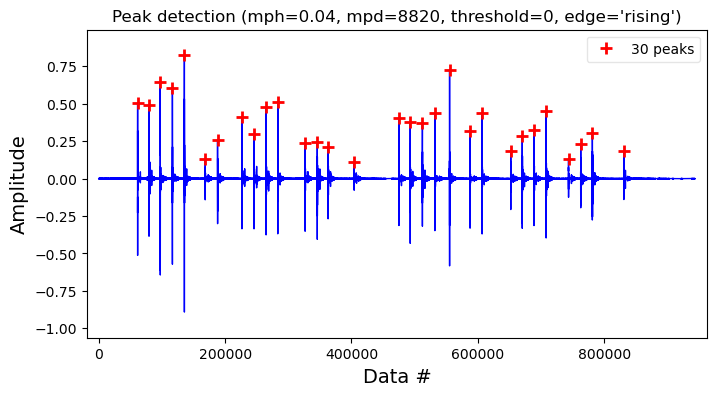

key R
final k=0.500	num_keys=30	peaks=30



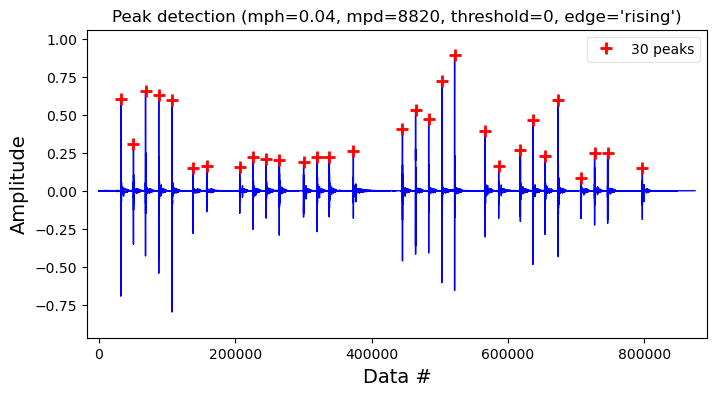

key T
final k=0.500	num_keys=30	peaks=30



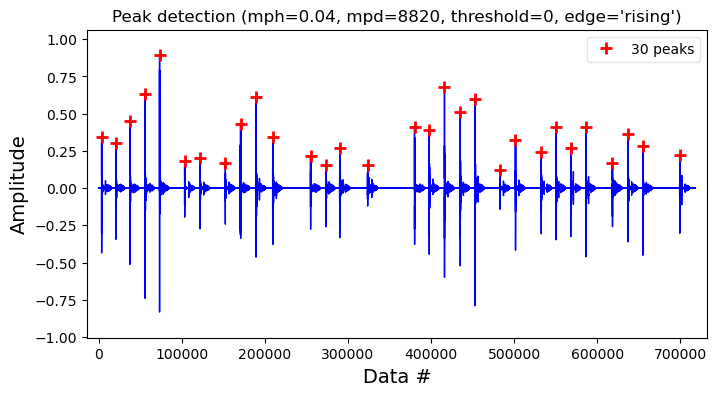

key Y
final k=0.500	num_keys=30	peaks=30



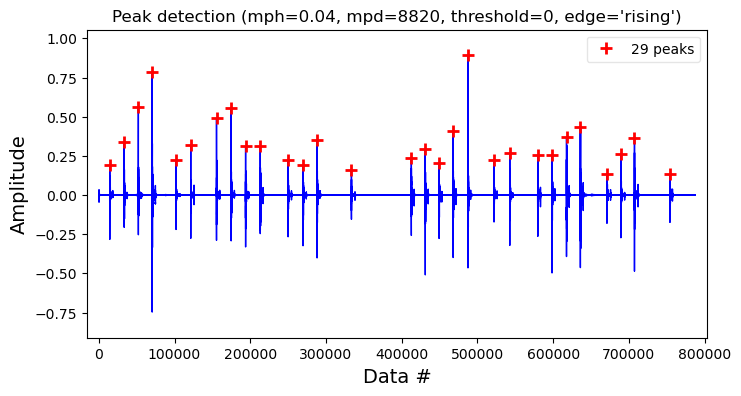

key U
final k=0.500	num_keys=29	peaks=29



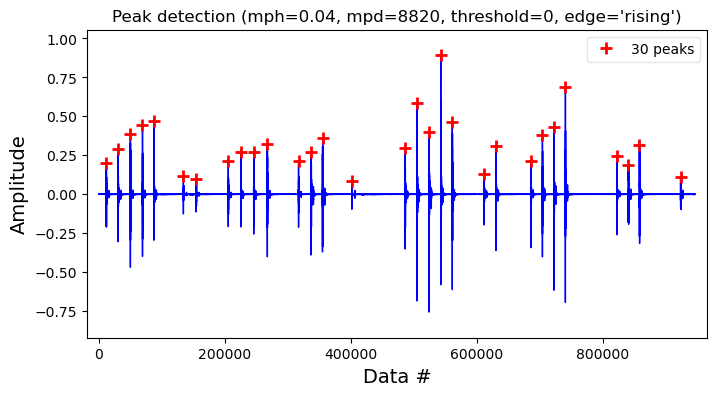

key I
final k=0.500	num_keys=24	peaks=30



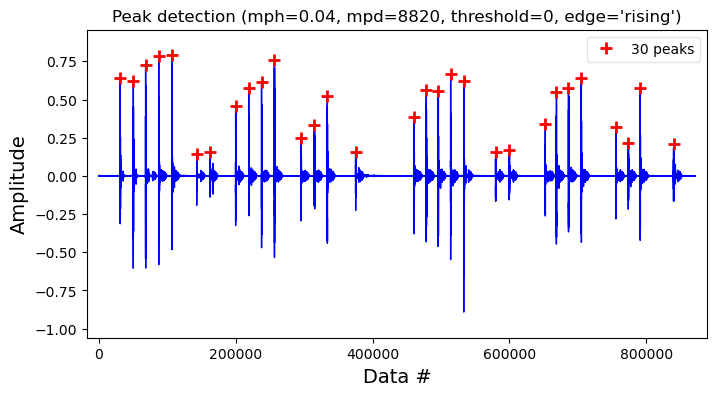

key O
final k=0.500	num_keys=25	peaks=30



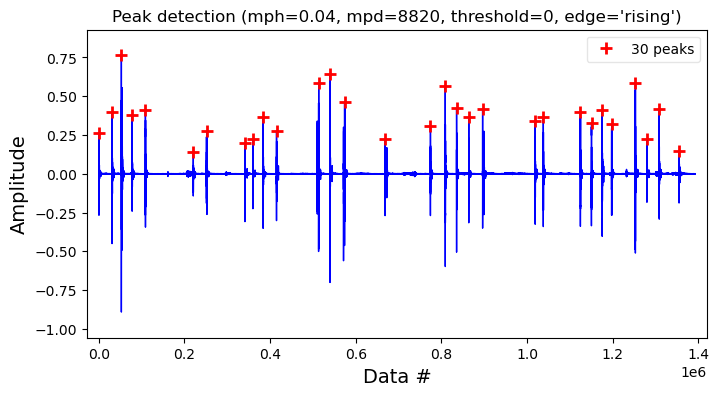

key P
final k=0.500	num_keys=21	peaks=30



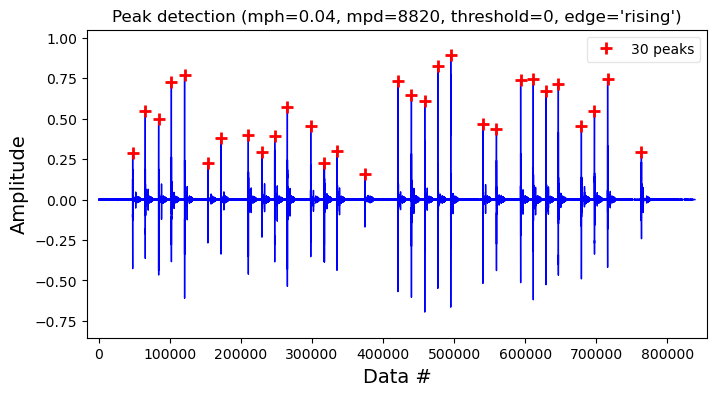

key A
final k=0.500	num_keys=30	peaks=30



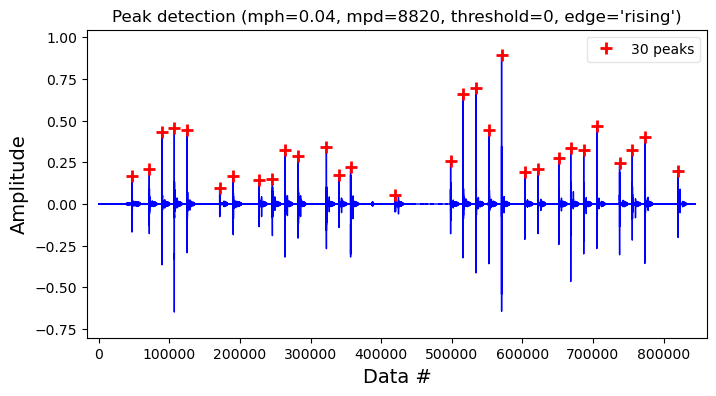

key S
final k=0.500	num_keys=30	peaks=30



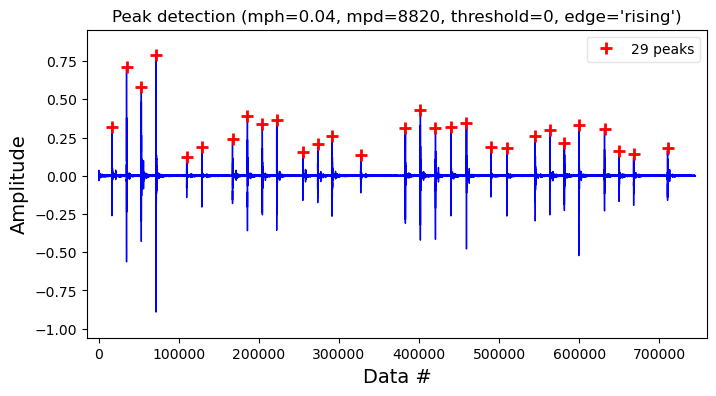

key D
final k=0.500	num_keys=29	peaks=29



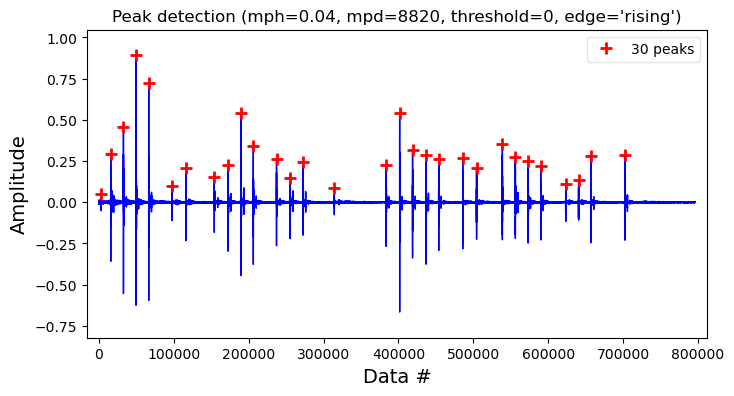

key F
final k=0.500	num_keys=29	peaks=30



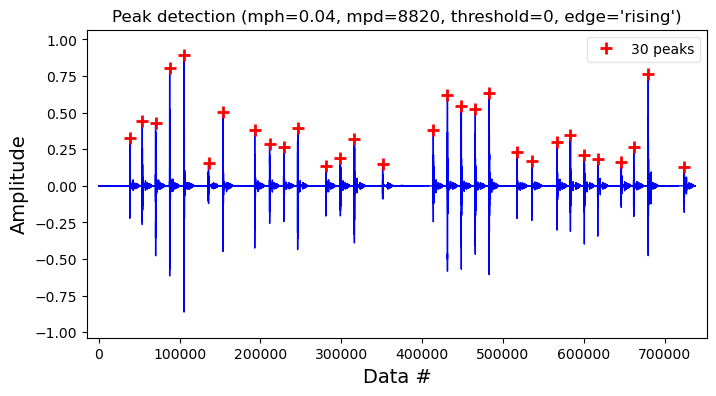

key G
final k=0.500	num_keys=30	peaks=30



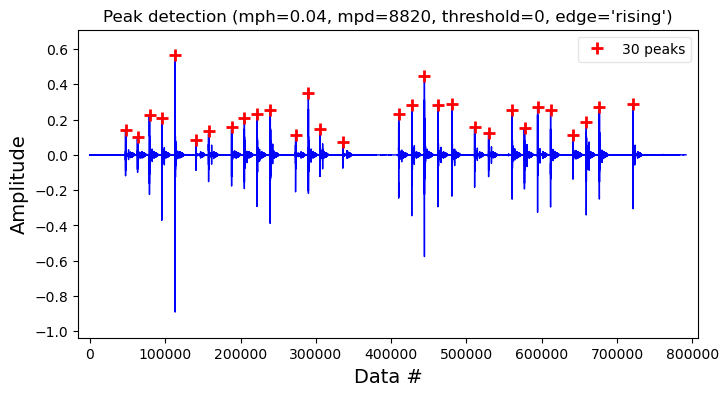

key H
final k=0.500	num_keys=29	peaks=30



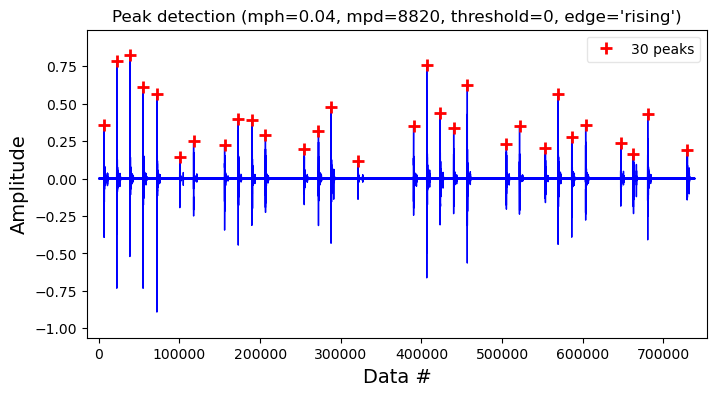

key J
final k=0.500	num_keys=30	peaks=30



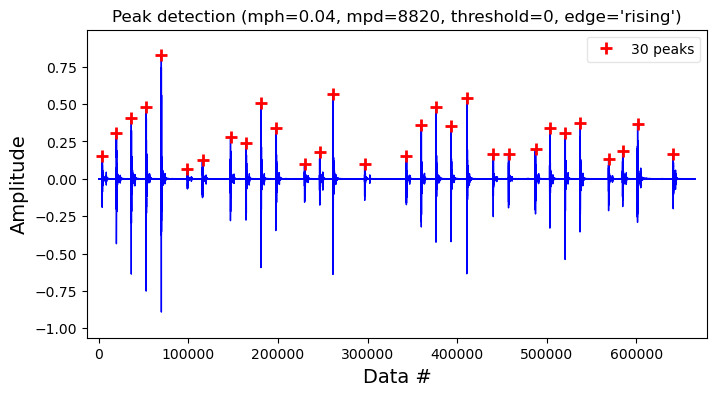

key K
final k=0.500	num_keys=23	peaks=30



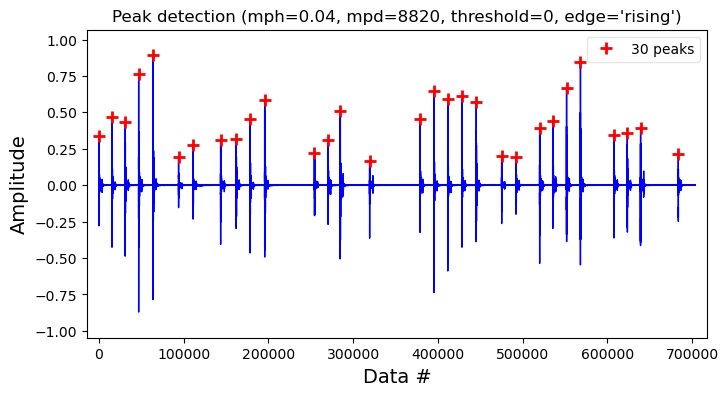

key L
final k=0.500	num_keys=28	peaks=30



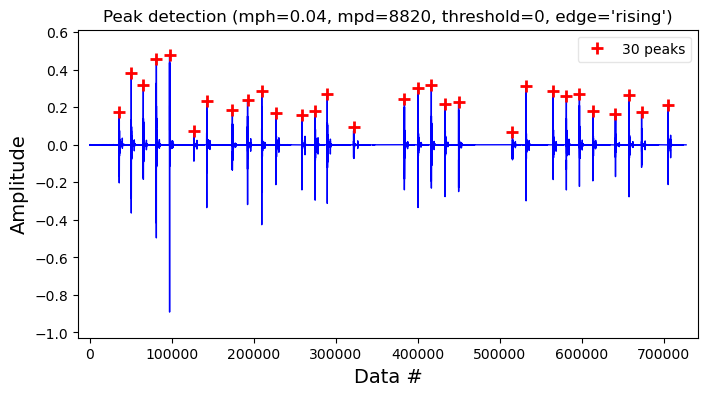

key Z
final k=0.500	num_keys=30	peaks=30



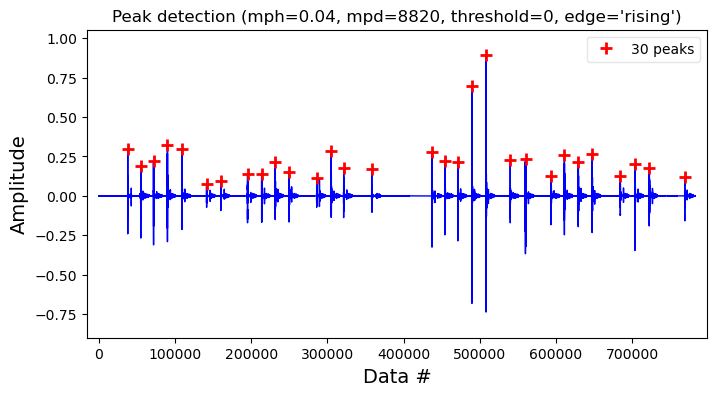

key X
final k=0.500	num_keys=31	peaks=30



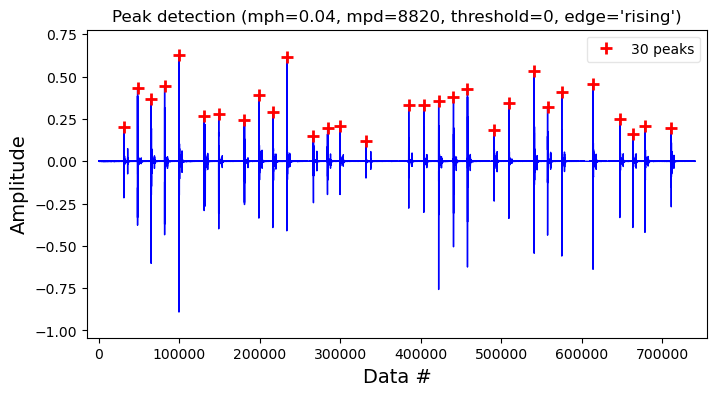

key C
final k=0.500	num_keys=31	peaks=30



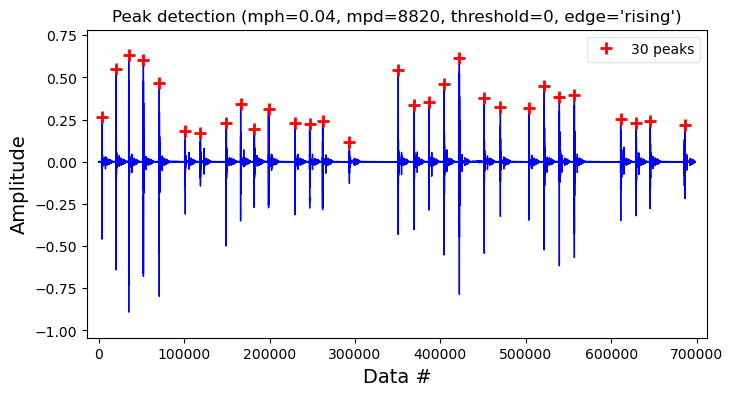

key V
final k=0.500	num_keys=30	peaks=30



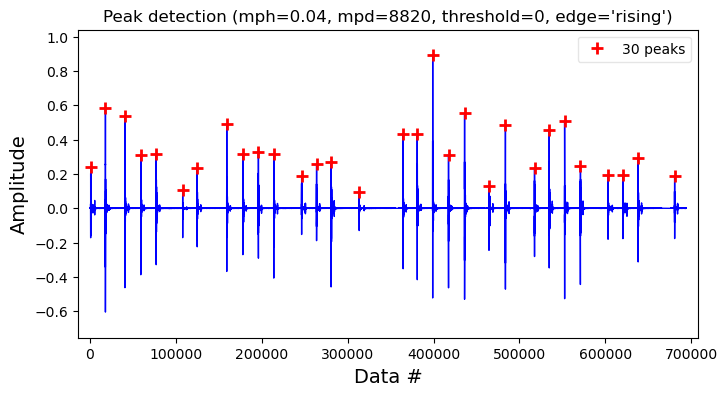

key B
final k=0.500	num_keys=30	peaks=30



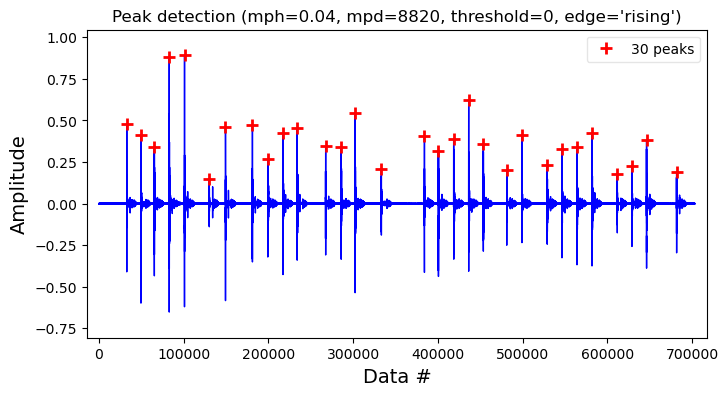

key N
final k=0.500	num_keys=30	peaks=30



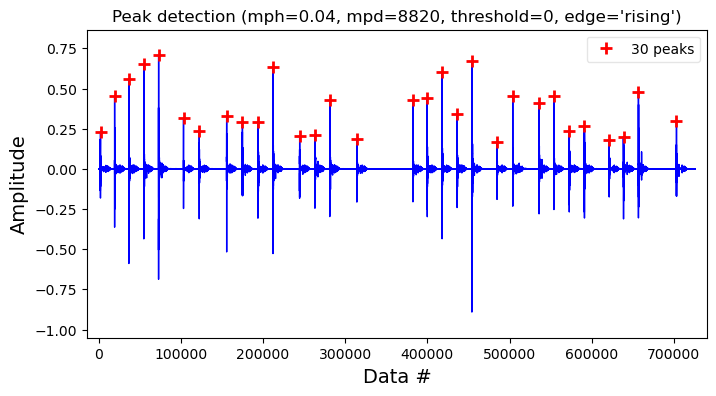

key M
final k=0.500	num_keys=30	peaks=30

      Key                                               File
0       0  [-1.5258789e-05, -0.00015258789, 0.00016784668...
1       0  [0.00018310547, 9.1552734e-05, 0.00010681152, ...
2       0  [-0.0001373291, -0.00019836426, -0.0004119873,...
3       0  [-0.0007171631, -0.000579834, -0.0005950928, -...
4       0  [-0.0005645752, -0.00048828125, -0.00047302246...
...   ...                                                ...
1041   35  [-6.1035156e-05, 0.00016784668, -0.00016784668...
1042   35  [-3.0517578e-05, -1.5258789e-05, -6.1035156e-0...
1043   35  [-0.00035095215, -0.00035095215, -0.0005187988...
1044   35  [-4.5776367e-05, 0.00012207031, 0.00016784668,...
1045   35  [-0.00018310547, -0.00016784668, -0.0001373291...

[1046 rows x 2 columns]


In [4]:
# Create dataset with new isolator method
curr_dataset = ki.create_dataset(curr_keys, initial_k=0.5, key_length=8820)
# Print dataset
print(curr_dataset)

In [5]:
# Write curr_dataset to a file to avoid running this shit over & over again
with open('curr_dataset.pkl', 'wb') as f:
    pickle.dump(curr_dataset, f)

# Read curr_dataset back from the file
with open('curr_dataset.pkl', 'rb') as f:
    curr_dataset = pickle.load(f)

# Verify the data
print(curr_dataset)

      Key                                               File
0       0  [-1.5258789e-05, -0.00015258789, 0.00016784668...
1       0  [0.00018310547, 9.1552734e-05, 0.00010681152, ...
2       0  [-0.0001373291, -0.00019836426, -0.0004119873,...
3       0  [-0.0007171631, -0.000579834, -0.0005950928, -...
4       0  [-0.0005645752, -0.00048828125, -0.00047302246...
...   ...                                                ...
1073   35  [-6.1035156e-05, 0.00016784668, -0.00016784668...
1074   35  [-3.0517578e-05, -1.5258789e-05, -6.1035156e-0...
1075   35  [-0.00035095215, -0.00035095215, -0.0005187988...
1076   35  [-4.5776367e-05, 0.00012207031, 0.00016784668,...
1077   35  [-0.00018310547, -0.00016784668, -0.0001373291...

[1078 rows x 2 columns]


In [5]:
# Selecting device to run shit on
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"

We'll be running with CoAtNetImp first, then CNN.

In [6]:
audio_descr="Using Mac audio from MKA and audio from Dataset-for-Binary. Using separation method based on peaks and waveforms. Using Jorge fix in isolator."

In [7]:
audio_samples = curr_dataset['File'].values.tolist()
labels = curr_dataset['Key'].values.tolist()

print(curr_dataset['File'][0]) 
# Index value is the peak point of the sample. Waveform value is the full waveform.

[-1.5258789e-05 -1.5258789e-04  1.6784668e-04 ... -3.7689209e-03
 -3.8452148e-03 -3.8452148e-03]


In [8]:
#verifying labels are mapped properly
print(f"initial labels:{labels}")

initial labels:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,

In [15]:
audioDataset = np.array(audio_samples, dtype = np.float32)
print(audio_samples[0])
mfcc = librosa.feature.mfcc(y=audioDataset, sr=44100) # shape: (n_mfcc, t)
labels = np.array(labels)


[-1.5258789e-05 -1.5258789e-04  1.6784668e-04 ... -3.7689209e-03
 -3.8452148e-03 -3.8452148e-03]


In [ ]:
# Write to a file to avoid running this shit over & over again
with open('labels.pkl', 'wb') as f:
    pickle.dump(labels, f)

# for testing: mfcc
with open('mfcc.pkl', 'wb') as f:
    pickle.dump(mfcc, f)

In [10]:
# Read mfcc back from the file
with open('mfcc.pkl', 'rb') as f:
    mfcc = pickle.load(f)

# Verify the data
print(mfcc[0])
print(len(mfcc))

FileNotFoundError: [Errno 2] No such file or directory: 'mfcc.pkl'

In [9]:
# Read labels back from file
with open('labels.pkl', 'rb') as f:
    labels = pickle.load(f)

In [18]:
# time shifting
#mfcc_features_new = mfcc_features.copy() # audio samples CNN
mfcc_features_new=mfcc.copy()
mfcc_features_new=mfcc_features_new.tolist()
labels=labels.tolist()

for i, sample in enumerate(mfcc):
    mfcc_features_new.append(aux.time_shift(sample))
    labels.append(labels[i])
    
# convert labels to a numpy array
labels = np.array(labels)
print(len(mfcc_features_new))
print(len(labels))

2092
2092


In [19]:
transform = Compose([aux.ToMelSpectrogram(audio_length=20000)])
transform_mfcc = Compose([aux.ToMfcc(audio_length=20000)])

In [20]:
# convert labels to a numpy array
labels = np.array(labels)
print(len(labels))
print(np.unique(labels)) #Checking that all label values are there 1-36

2092
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]


In [22]:
audioDatasetFin, audioDatasetMfcc = [], []
audioDatasetMfccMasking = [] #from new version
all_labels = []  # List to store all labels

total_time = time.time()
for i in range(len(mfcc_features_new)):
    print(f"Processing sample {i} of {len(mfcc_features_new)}")
    start=time.time()

    #downsampling
    downsampled_sample = aux.downsample_audio(mfcc_features_new[i], 19119)
    print(f"Donwsampling took {time.time()-start} seconds")

    #converting to floating point
    audio_sample_float = np.array(downsampled_sample, dtype=np.float32)
    
    #transforming
    checkpoint = time.time()
    transformed_sample = transform(audio_sample_float)
    print(f"Transforming took {time.time()-checkpoint} seconds")
    checkpoint = time.time()
    transformed_mfcc = transform_mfcc(audio_sample_float)
    print(f"Transforming into mfcc took {time.time()-checkpoint} seconds")
    checkpoint = time.time()
    
    # making sure labels are ok
    assert labels[i] < len(curr_keys), f"Label {labels[i]} out of range"
    assert labels[i] >= 0, f"Label {labels[i]} out of range"
    print(f"Label for sample {i}: {labels[i]}")
    
    # Collect labels
    all_labels.append(labels[i])

    #appending
    audioDatasetMfcc.append((transformed_sample, transformed_mfcc, labels[i]))
    
    # CoAtNet part
    audioDatasetFin.append((transformed_sample, labels[i]))
    audioDatasetFin.append((aux.masking(transformed_sample), labels[i]))
    print(f"CoAtNet part took {time.time()-checkpoint} seconds")
    checkpoint = time.time()
    
    # masking part
    audioDatasetMfccMasking.append((aux.masking(transformed_sample), transformed_mfcc, labels[i]))
    audioDatasetMfccMasking.append((transformed_sample, transformed_mfcc, labels[i]))
    print(f"Masking part took {time.time()-checkpoint} seconds")
    print(f"Total time for sample {i} is {time.time()-start} seconds")
print(f"Total time for all samples is {time.time()-total_time} seconds")


Processing sample 0 of 2092
Donwsampling took 0.020999670028686523 seconds


c:\Users\Kat\.conda\envs\tesis\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=899
  warnings.warn(


Mel spectrogram time: 1.6926 seconds
Resizing time: 0.0127 seconds
Expanding time: 0.0000 seconds
Tensor conversion time: 0.0254 seconds
Transforming took 1.8389363288879395 seconds


c:\Users\Kat\.conda\envs\tesis\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=899
  warnings.warn(


Transforming into mfcc took 1.720872163772583 seconds
Label for sample 0: 0
CoAtNet part took 0.022388935089111328 seconds
Masking part took 0.0 seconds
Total time for sample 0 is 3.604621410369873 seconds
Processing sample 1 of 2092
Donwsampling took 0.02278876304626465 seconds
Mel spectrogram time: 1.4378 seconds
Resizing time: 0.0000 seconds
Expanding time: 0.0000 seconds
Tensor conversion time: 0.0000 seconds
Transforming took 1.5369584560394287 seconds
Transforming into mfcc took 1.6061897277832031 seconds
Label for sample 1: 0
CoAtNet part took 0.0016193389892578125 seconds
Masking part took 0.0 seconds
Total time for sample 1 is 3.168565273284912 seconds
Processing sample 2 of 2092
Donwsampling took 0.025367021560668945 seconds
Mel spectrogram time: 1.3536 seconds
Resizing time: 0.0020 seconds
Expanding time: 0.0000 seconds
Tensor conversion time: 0.0010 seconds
Transforming took 1.4545650482177734 seconds
Transforming into mfcc took 1.4968087673187256 seconds
Label for sample 2

In [29]:
# for mfcc way

audioDatasetFin, audioDatasetMfcc = [], []
audioDatasetMfccMasking = [] #from new version

for i in range(len(mfcc)): #if not working try with audioDataset
    #converting to floating point
    print(f"Processing sample {i} of {len(mfcc)}")
    start=time.time()
    

    #downsampling
    downsampled_sample = aux.downsample_audio(mfcc[i], 19119)
    print(f"Donwsampling took {time.time()-start} seconds")

    audio_sample_float = np.array(downsampled_sample, dtype=np.float32)

    transformed_sample = transform(audio_sample_float)
    print(f"Transforming took {time.time()-start} seconds")
    checkpoint = time.time()
    transformed_mfcc = transform_mfcc(audio_sample_float)
    audioDatasetMfcc.append((transformed_sample, transformed_mfcc, labels[i]))
    
    # CoAtNet part
    audioDatasetFin.append((transformed_sample, labels[i]))
    audioDatasetFin.append((aux.masking(transformed_sample), labels[i]))
    print(f"CoAtNet part took {time.time()-checkpoint} seconds")
    checkpoint = time.time()
    
    # masking part
    audioDatasetMfccMasking.append((aux.masking(transformed_sample), transformed_mfcc, labels[i]))
    audioDatasetMfccMasking.append((transformed_sample, transformed_mfcc, labels[i]))
    print(f"Masking part took {time.time()-checkpoint} seconds")
    print(f"Total time for sample {i} is {time.time()-start} seconds")


Processing sample 0 of 1046
Donwsampling took 0.015532732009887695 seconds
Mel spectrogram time: 1.7800 seconds
Resizing time: 0.0010 seconds
Expanding time: 0.0010 seconds
Tensor conversion time: 0.0000 seconds
Transforming took 1.9022798538208008 seconds
CoAtNet part took 1.668015480041504 seconds
Masking part took 0.0010023117065429688 seconds
Total time for sample 0 is 3.5712976455688477 seconds
Processing sample 1 of 1046
Donwsampling took 0.02099776268005371 seconds
Mel spectrogram time: 1.3554 seconds
Resizing time: 0.0000 seconds
Expanding time: 0.0000 seconds
Tensor conversion time: 0.0000 seconds
Transforming took 1.4785442352294922 seconds
CoAtNet part took 1.5244004726409912 seconds
Masking part took 0.0 seconds
Total time for sample 1 is 3.0029447078704834 seconds
Processing sample 2 of 1046
Donwsampling took 0.022368907928466797 seconds
Mel spectrogram time: 1.3741 seconds
Resizing time: 0.0000 seconds
Expanding time: 0.0000 seconds
Tensor conversion time: 0.0000 seconds


In [23]:
# Read audioDatasetMfcc back from the file
with open('audioDatasetMfcc.pkl', 'rb') as f:
    audioDatasetMfcc = pickle.load(f)

# Verify the data
print(audioDatasetMfcc[0][0]) #audioDatasetMfcc is a list of tuples of pytorch tensors

FileNotFoundError: [Errno 2] No such file or directory: 'audioDatasetMfcc.pkl'

In [30]:
print(audioDatasetMfcc[0][2]) #orden de []: [index de lista (0-1077)] [index de tupla (0-2)]

# tuples:
#[i][0]transformed_sample (PyTorch tensor with dimensions 1x64x64x4)
#[i][1]transformed_mfcc (PyTorch tensor with dimensions 2x20x20000)
#[i][2]labels[i] (label for the sample)
#aparentemente las labels estan correctas en este punto

0


In [31]:
len(audioDatasetMfcc)

1046

In [32]:
audioDatasetMfcc[0][0].shape

torch.Size([1, 64, 64, 4])

# CNN

In [33]:
random_state = 42
num_classes=len(curr_keys)
print(num_classes)

36


In [34]:
# values for current run
train_final_set, test_set = train_test_split(audioDatasetMfcc, test_size=0.2, random_state=random_state)
num_epochs = 100
main_architecture = "CNN_LSTM"
currday = datetime.today().strftime('%Y-%m-%d')
model_name = f"model_multiclass_{num_epochs}_{main_architecture}_{currday}.pth"
description = "2 layer CNN (32 and 64 output channels) with final 2 Dense Layers (512 and "+str(num_classes)+") result concatenated with \n 2 LSTMs (hidden_size=32),  from mfcc with 2 Dense Layers (64 and 16) with a final Lazy Linear layer output of "+str(num_classes)+". "+audio_descr+" n_fft="+str(N_FFT)+", hop_length="+str(HOP_LENGTH)+". Using np.average(fold_results). Using downsampling."

In [35]:
# Training part
fold_stats = cnn.train_with_cross_validation(train_final_set, num_epochs, model_name, num_classes,random_state=random_state, device=device)
max_val = 0
real_num_epochs = 0
for fold_stat in fold_stats: #using folds instead of LOO
    if fold_stat[1] > max_val:
        max_val = fold_stat[1]
        real_num_epochs = fold_stat[0]

Fold 1/10
Epoch [5/100], Train Loss: 2.9393, Train Accuracy: 0.1330, Val Accuracy: 0.0714, Iter Time: 2.15s
Epoch [10/100], Train Loss: 2.4866, Train Accuracy: 0.2274, Val Accuracy: 0.1667, Iter Time: 2.18s
Epoch [15/100], Train Loss: 2.0581, Train Accuracy: 0.3364, Val Accuracy: 0.1429, Iter Time: 2.17s
Epoch [20/100], Train Loss: 1.6994, Train Accuracy: 0.4668, Val Accuracy: 0.1667, Iter Time: 2.16s
Epoch [25/100], Train Loss: 1.4132, Train Accuracy: 0.5532, Val Accuracy: 0.2976, Iter Time: 2.20s
Epoch [30/100], Train Loss: 1.1044, Train Accuracy: 0.6622, Val Accuracy: 0.2857, Iter Time: 2.18s
Early stopping after 33 epochs
Fold 1 Best Validation Accuracy: 0.3095
Fold 2/10
Epoch [5/100], Train Loss: 2.9680, Train Accuracy: 0.1277, Val Accuracy: 0.0357, Iter Time: 2.16s
Epoch [10/100], Train Loss: 2.4856, Train Accuracy: 0.2207, Val Accuracy: 0.1310, Iter Time: 2.16s
Epoch [15/100], Train Loss: 2.0362, Train Accuracy: 0.3697, Val Accuracy: 0.2024, Iter Time: 2.19s
Epoch [20/100], Trai

In [36]:
# prediction part

prediction, pred_list = cnn.predict_mfcc(test_set, model_name, device, curr_keys,num_classes)
labels_set = [t[2] for t in test_set]
final_labels_set = [curr_keys[ind] for ind in labels_set]

In [37]:
print(pred_list)

['L', 'G', 'S', 'E', 'G', 'C', '9', '9', 'Y', 'O', 'W', 'U', 'D', 'E', 'G', 'J', '2', 'J', 'D', 'D', 'P', 'C', 'T', '9', 'G', '2', '9', '5', 'G', '5', 'C', '2', '9', 'Z', 'E', 'A', 'R', '9', '1', 'G', 'L', '4', '3', 'I', 'R', 'L', '5', '2', 'H', 'Y', 'T', 'T', 'Y', 'M', 'W', 'G', 'D', 'I', 'G', 'A', 'A', '2', 'Z', 'J', 'A', 'D', 'L', '8', 'T', 'T', 'I', 'X', 'A', 'B', '9', 'I', '6', 'H', 'R', 'O', 'P', 'V', '2', 'U', 'M', 'F', '9', 'H', '4', 'M', 'G', 'J', 'G', 'A', '2', 'E', 'G', '6', '2', '4', '5', '2', '2', '1', 'T', '5', 'T', 'X', '9', 'W', '1', 'M', 'M', 'W', '6', '2', 'U', 'G', 'O', 'M', 'G', 'Z', 'S', '2', 'G', 'W', '9', 'L', 'Z', 'R', 'Y', 'D', 'Z', 'D', 'Y', 'B', 'V', 'I', 'L', 'S', '2', 'E', 'L', 'J', 'Q', '5', 'U', 'A', 'Z', '8', 'U', 'X', 'R', 'G', 'L', 'F', 'Z', '4', 'C', 'Z', '1', '5', 'D', 'D', 'X', 'Q', 'R', 'L', 'S', 'A', 'L', 'R', 'S', 'O', 'Q', 'L', 'E', 'I', 'J', 'R', 'I', 'W', 'P', 'J', '4', 'J', 'W', 'T', 'J', '1', 'A', 'Q', '3', 'M', 'Q', 'V', 'W', '3', 'E', 'U',

In [ ]:
# Metrics calculation
accuracy = accuracy_score(final_labels_set, prediction)
precision = precision_score(final_labels_set, prediction, average='macro')
recall = recall_score(final_labels_set, prediction, average='macro')
f1 = sklearn.metrics.f1_score(final_labels_set, prediction, average='macro')

# Save in csv file
aux.save_csv(model_name, real_num_epochs, description, accuracy, precision, recall, f1)

# Print results
print("Final Results!")
print(f"Model: {model_name}")
print(description)
print(f"Epochs: {real_num_epochs}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Final Results!
Model: model_multiclass_100_CNN_LSTM_2024-10-14.pth
2 layer CNN (32 and 64 output channels) with final 2 Dense Layers (512 and 36) result concatenated with 
 2 LSTMs (hidden_size=32),  from mfcc with 2 Dense Layers (64 and 16) with a final Lazy Linear layer output of 36. Using Mac audio from MKA and audio from Dataset-for-Binary. Using separation method based on peaks and waveforms. Using Jorge fix in isolator. n_fft=1024, hop_length=225. Using np.average(fold_results). Using downsampling.
Epochs: 43
Accuracy: 0.39351851851851855
Precision: 0.42807239057239055
Recall: 0.4178290844957511
F1 Score: 0.3789236369925224


In [39]:
# LLAMA 3.1 prediction
try:
    client = Client(base_url='http://localhost:1234/v1', api_key='llm-studio')

    response = client.chat.completions.create(model='lmstudio-community/Meta-Llama-3-8B-Instruct-GGUF', messages=[
      {
        'role': 'user',
        'content': ''.join(pred_list)
      },
    ])
    print("Response:", response.choices[0].message.content)
except Exception as e:
    print(f"An error occurred: {e}")

Response: Here are the 5 most likely English sentences:

1. Legislate geography
2. Legislate geography yet
3. Legislate geography now
4. Legislate geography today
5. Legislate geography here
